# Function Transformer

**1. Log Transformation**

The log transformation is primarily used for right-skewed data (positively skewed data) where the values are spread out with a long tail on the right-hand side. It can help compress the larger values and spread out smaller values, making the distribution more symmetric (closer to normal) and easier to work with for certain machine learning models.

**When to use Log Transformation:**
*    **1. Right-Skewed Data (Positively Skewed):**
    Right-skewed data has a long tail on the right side, where the majority of the data points are clustered on the left, but there are a few large values that make the data highly skewed.
*    **2. Left-Skewed Data (Negatively Skewed):**
    Left-skewed data has a long tail on the left side. Log transformation is generally not effective for left-skewed data because it compresses the small values, making the left tail even longer.
*    **3. Symmetric (Center) Data:**
    If the data is already centered and symmetric (i.e., normally distributed), applying a log transformation is not necessary. It might even distort the data, as it compresses values that are already well-behaved.

**2. Reciprocal Transformer**

In simple terms, the reciprocal of a number x is 1/x, this transformation is useful for handling skewed data (especially when data has very large values) and can help make the data distribution more symmetric.

**When is it Useful?**

* **1. Right-Skewed Data (Positively Skewed):**
    If your data is right-skewed with very large values, applying the reciprocal transformation can help compress these large values and spread out smaller values, making the data distribution more symmetric.
* **2. Not Suitable for Zero or Negative Values:** 
    The reciprocal transformation can only be applied to positive values. For zero, the reciprocal is undefined (1/0), and it will not work for negative values unless you adjust the data beforehand.

**3. Square Transformer**

The Square Transformer raises each data value to the power of 2 (squares it). This transformation is useful in certain situations, especially when your data is left-skewed (negative skew) and you want to amplify the larger values.
X^2

**When to use it?**

* **1. For left-skewed data:** 
    The square transformer can be used to amplify smaller values and compress larger values, helping to balance the distribution.
* **2. Data with small values:**
    Useful for situations where you want to emphasize small values, as squaring amplifies their impact.

**4. Square Root Transformer (√x)**

The Square Root Transformer takes the square root of each value. This transformation is useful for right-skewed data (positively skewed data) where you have very large values that you want to compress.

**When to use it?**

* **1. For right-skewed data:** 
    The square root transformation helps compress large values (on the right side) and spread out smaller values (on the left side).
* **2. Moderate compression:** 
    It's less aggressive than a log or reciprocal transformation, so it may be useful for mild right-skewed data.

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import FunctionTransformer, StandardScaler
from sklearn.metrics import accuracy_score

In [2]:
np.random.seed(42)

In [3]:
data = {
    'Age': np.random.randint(1, 80, size=5000),
    'Fare': np.random.uniform(10, 500, size=5000),
    'Sex': np.random.choice(['male', 'female'], size=5000),
    'Pclass': np.random.choice([1, 2, 3], size=5000),
    'Survived': np.random.choice([0, 1], size=5000)
}

# Create DataFrame
df = pd.DataFrame(data)

In [4]:
df.head()

,Age,Fare,Sex,Pclass,Survived
0,52,219.468363,male,2,0
1,15,171.839487,female,1,1
2,72,286.473590,female,1,1
3,61,426.781519,male,3,0
4,21,108.748905,female,2,1


In [5]:
df['Sex'].value_counts()

Sex
female    2571
male      2429
Name: count, dtype: int64

In [6]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

In [7]:
# Define the transformers for numeric columns
reciprocal_transformer = FunctionTransformer(np.reciprocal, validate=True)
square_transformer = FunctionTransformer(np.square, validate=True)
sqrt_transformer = FunctionTransformer(np.sqrt, validate=True)
log_transformer = FunctionTransformer(np.log1p, validate=True)  # Using log1p for log(x+1) to handle 0

In [8]:
# Function to apply the transformations
def transform_data(df, transformer):
    transformed_data = df.copy()
    # Apply transformations only to 'Age' and 'Fare' columns
    transformed_data[['Age', 'Fare']] = transformer.fit_transform(transformed_data[['Age', 'Fare']])
    return transformed_data

In [9]:
# Train-test split
X = df[['Age', 'Fare', 'Sex', 'Pclass']]
y = df['Survived']

In [10]:
# Split the dataset into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Function to apply the transformations and train the models
def evaluate_model(X_train, y_train, X_test, y_test, transformer, model):
    
    # Apply the transformer to the training and test set
    X_train_transformed = transform_data(X_train, transformer)
    X_test_transformed = transform_data(X_test, transformer)

    # Train the model
    model.fit(X_train_transformed, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test_transformed)

    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy

In [12]:
# Logistic Regression and Decision Tree
log_reg = LogisticRegression(max_iter=1000)
dec_tree = DecisionTreeClassifier()

In [13]:
# Evaluate each transformer with both models
transformers = [reciprocal_transformer, square_transformer, sqrt_transformer, log_transformer]
transformer_names = ['Reciprocal', 'Square', 'Square Root', 'Log']

In [14]:
# Store results
results_log_reg = []
results_dec_tree = []

for transformer, name in zip(transformers, transformer_names):
    log_reg_accuracy = evaluate_model(X_train, y_train, X_test, y_test, transformer, log_reg)
    dec_tree_accuracy = evaluate_model(X_train, y_train, X_test, y_test, transformer, dec_tree)
    
    results_log_reg.append(log_reg_accuracy)
    results_dec_tree.append(dec_tree_accuracy)

    print(f"Logistic Regression Accuracy with {name} Transformation: {log_reg_accuracy:.4f}")
    print(f"Decision Tree Accuracy with {name} Transformation: {dec_tree_accuracy:.4f}")
    print()

Logistic Regression Accuracy with Reciprocal Transformation: 0.5050
Decision Tree Accuracy with Reciprocal Transformation: 0.5020

Logistic Regression Accuracy with Square Transformation: 0.5300
Decision Tree Accuracy with Square Transformation: 0.5080

Logistic Regression Accuracy with Square Root Transformation: 0.5320
Decision Tree Accuracy with Square Root Transformation: 0.4950

Logistic Regression Accuracy with Log Transformation: 0.5170
Decision Tree Accuracy with Log Transformation: 0.4960



In [15]:
# Perform cross-validation on both models
cross_val_log_reg = cross_val_score(log_reg, X_train, y_train, cv=5).mean()
cross_val_dec_tree = cross_val_score(dec_tree, X_train, y_train, cv=5).mean()

print(f"Logistic Regression Cross-Validation Score: {cross_val_log_reg:.2f}")
print(f"Decision Tree Cross-Validation Score: {cross_val_dec_tree:.2f}")

Logistic Regression Cross-Validation Score: 0.4832
Decision Tree Cross-Validation Score: 0.5005


In [18]:
# QQ and PDF Plots for Age and Fare Before and After Transformation

def qq_plot(data, title):
    """Generate a QQ plot"""
    stats.probplot(data, dist="norm", plot=plt)
    plt.title(f'QQ Plot - {title}')
    plt.show()

def pdf_plot(data, title):
    """Generate a PDF plot"""
    sns.histplot(data, kde=True, stat='density', color='blue')
    plt.title(f'PDF Plot - {title}')
    plt.show()

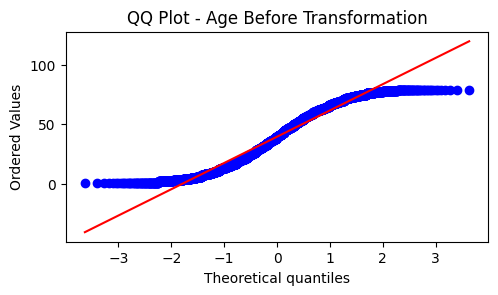

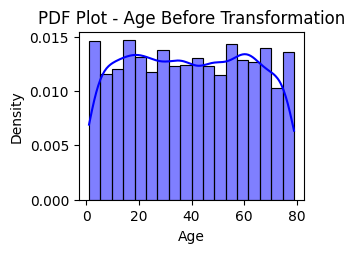

In [22]:
from scipy import stats

# Before Transformation for 'Age' and 'Fare'
plt.figure(figsize=(12, 6))

# QQ Plot for 'Age'
plt.subplot(2, 2, 1)
qq_plot(df['Age'], 'Age Before Transformation')

# PDF Plot for 'Age'
plt.subplot(2, 2, 2)
pdf_plot(df['Age'], 'Age Before Transformation')

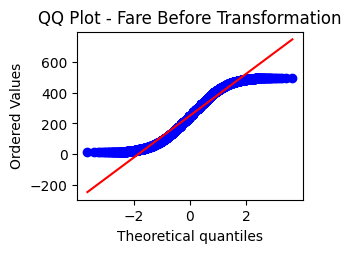

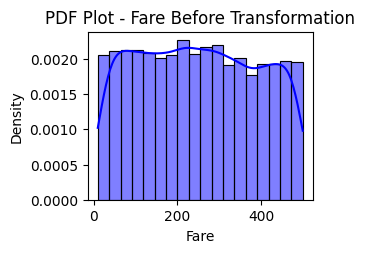

<Figure size 640x480 with 0 Axes>

In [23]:
# QQ Plot for 'Fare'
plt.subplot(2, 2, 3)
qq_plot(df['Fare'], 'Fare Before Transformation')

# PDF Plot for 'Fare'
plt.subplot(2, 2, 4)
pdf_plot(df['Fare'], 'Fare Before Transformation')

plt.tight_layout()
plt.show()

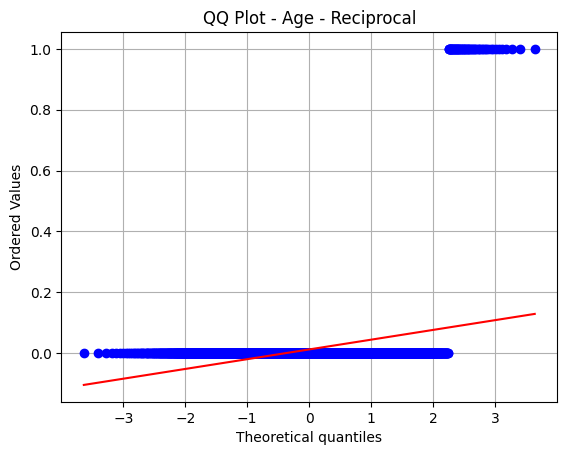

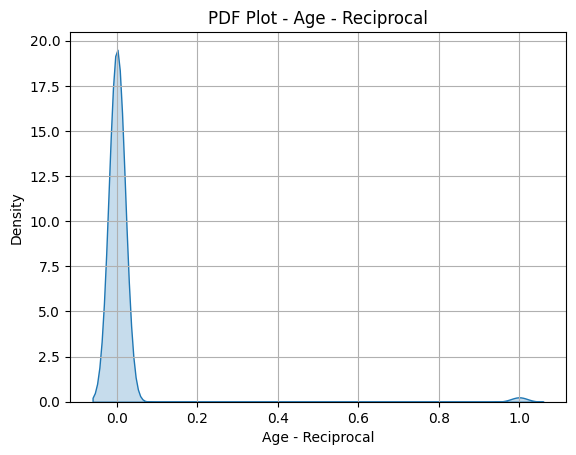

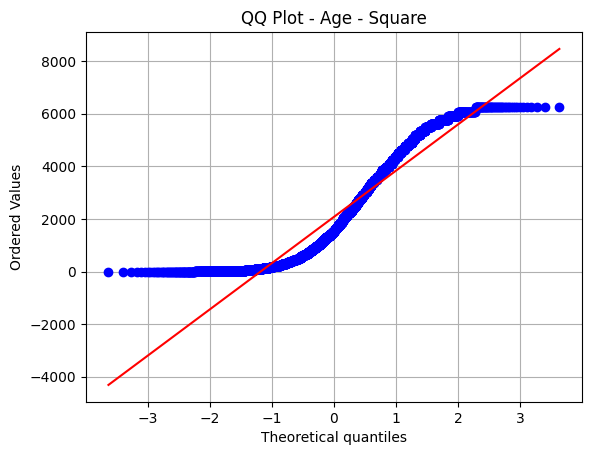

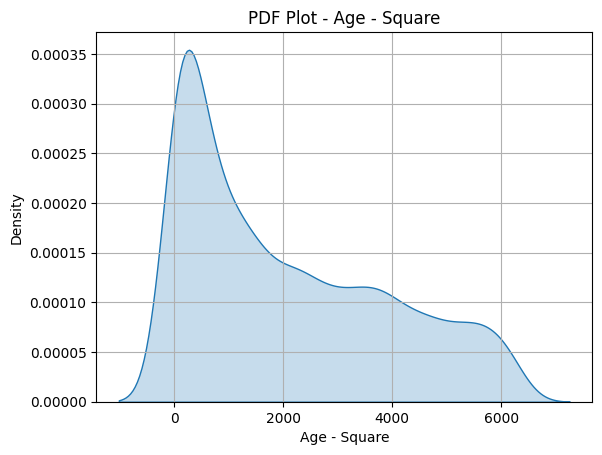

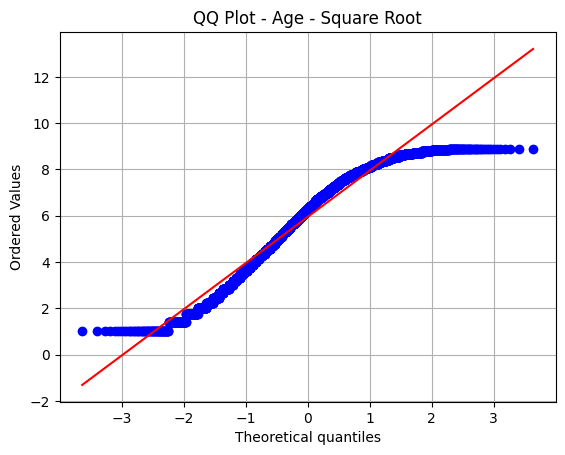

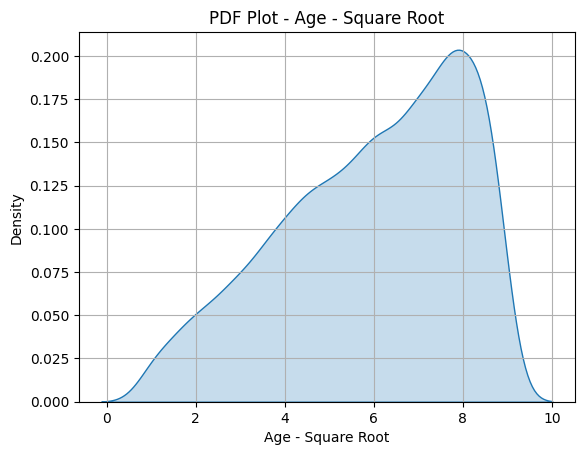

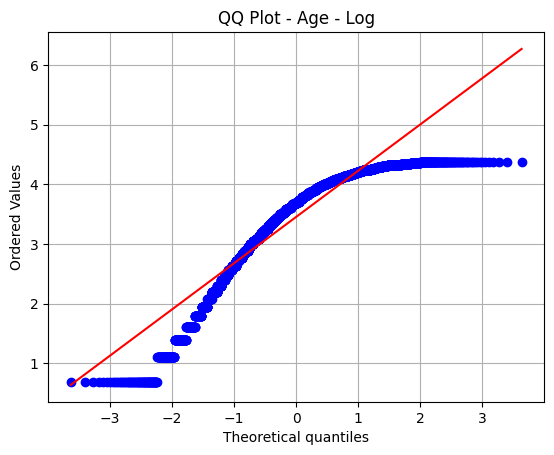

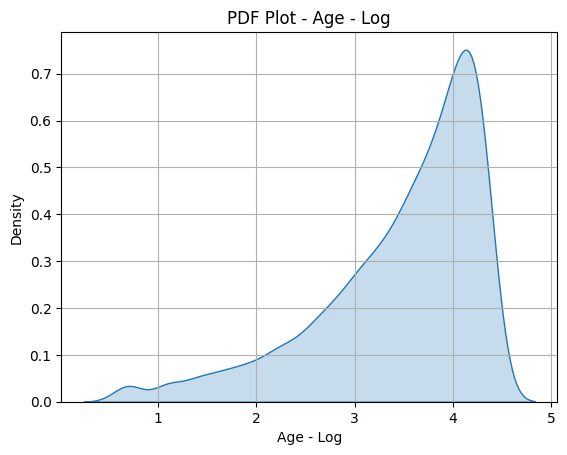

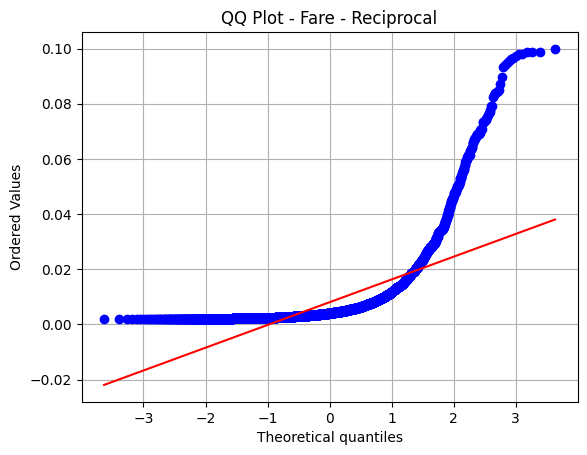

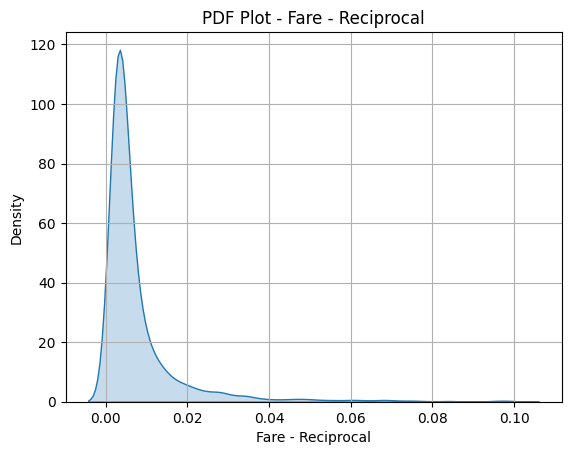

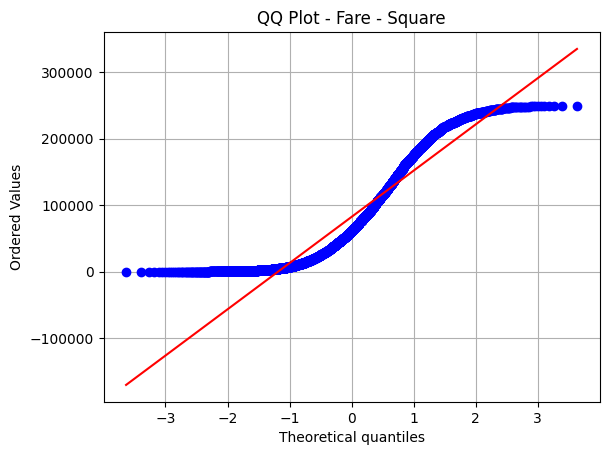

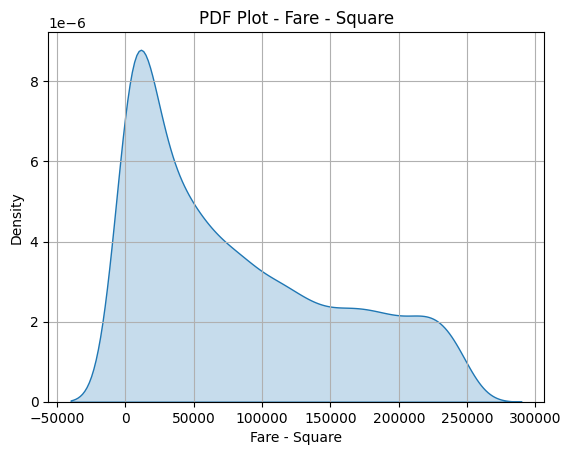

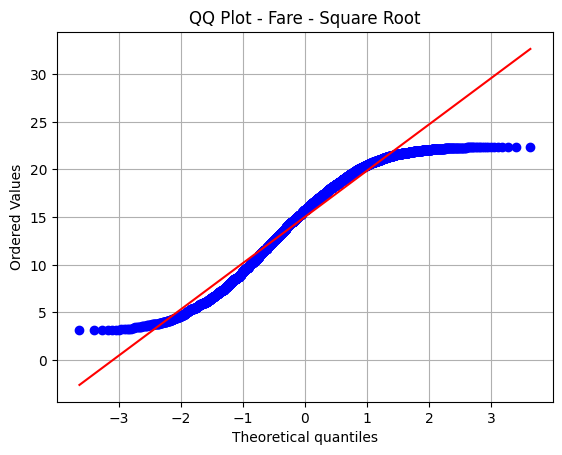

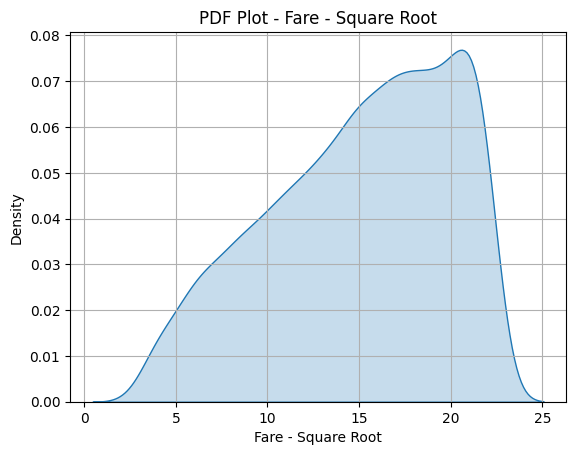

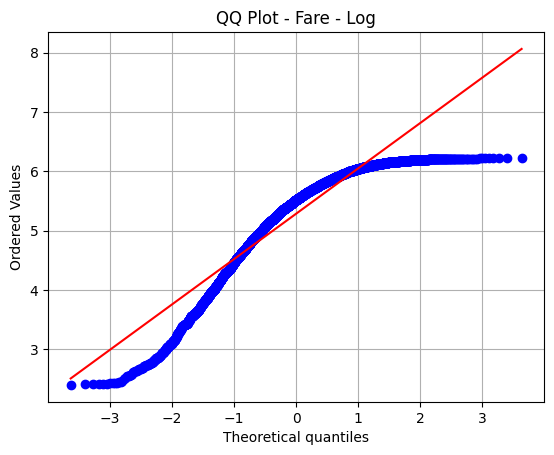

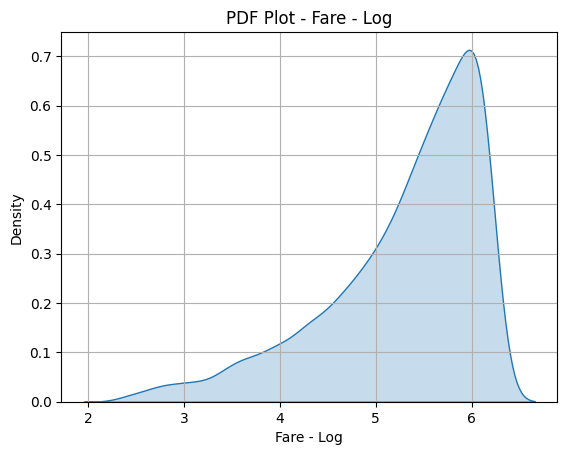

In [27]:
# Function to generate QQ plot
def qq_plot(data, title):
    """Generate a QQ plot"""
    stats.probplot(data, dist="norm", plot=plt)
    plt.title(f'QQ Plot - {title}')
    plt.grid()
    plt.show()

# Function to generate PDF plot
def pdf_plot(data, title):
    """Generate a PDF plot"""
    sns.kdeplot(data, fill=True)
    plt.title(f'PDF Plot - {title}')
    plt.xlabel(title)
    plt.ylabel('Density')
    plt.grid()
    plt.show()

# Function to plot transformed data
def plot_transformed_data(transformer, transformer_name, column):
    transformed_data = transformer.fit_transform(df[[column]])
    
    # Convert to 1D for plotting
    transformed_data = transformed_data.flatten()
    
    # QQ Plot for transformed data
    qq_plot(transformed_data, f'{column} - {transformer_name}')
    
    # PDF Plot for transformed data
    pdf_plot(transformed_data, f'{column} - {transformer_name}')

# Plot for each transformation on 'Age'
for transformer, name in zip(transformers, transformer_names):
    plot_transformed_data(transformer, name, 'Age')

# Plot for each transformation on 'Fare'
for transformer, name in zip(transformers, transformer_names):
    plot_transformed_data(transformer, name, 'Fare')


<Figure size 1000x600 with 0 Axes>

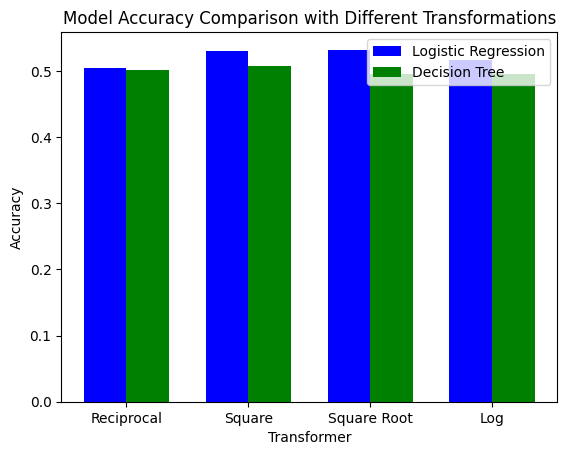

In [17]:
# Visualization
plt.figure(figsize=(10, 6))
x = np.arange(len(transformers))
width = 0.35

fig, ax = plt.subplots()
# Plot the accuracy scores for both models
ax.bar(x - width/2, results_log_reg, width, label='Logistic Regression', color='blue')
ax.bar(x + width/2, results_dec_tree, width, label='Decision Tree', color='green')

ax.set_xlabel('Transformer')
ax.set_ylabel('Accuracy')
ax.set_title('Model Accuracy Comparison with Different Transformations')
ax.set_xticks(x)
ax.set_xticklabels(transformer_names)
ax.legend()

plt.show()